In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_excel('Stars List.xlsx', skiprows=1)

In [3]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis. mag.,abs. mag.,Dist. (ly),Sp. class,Notes
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid"
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star..."
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s..."
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa"
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak"
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak"
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd"


In [29]:
def convert_RA_to_Num(value):
    RA_Text = re.compile('\+?(?P<hour>[0-9]{1,2})(?P<unit>[hH°]) ?((?P<minute>[0-9]{1,2}).)? ?((?P<second>[0-9]{1,2}\.?[0-9]+).)?')
    result = RA_Text.match(value)
    if result:
        coordonate = {}
        for i in ['hour', 'minute', 'second']:
            coordonate[i] = float(result.group(i)) if result.group(i) is not None else 0
        if result.group('unit') in ['h', 'H']:
            degree = coordonate['hour'] * 360 / 24
        else:
            degree = coordonate['hour']
        res = degree + (coordonate['minute'] / 60) + (coordonate['second'] / 3600)
    else:
        res = None
    
    return res


In [30]:
convert_RA_to_Num('+49° 18′ 47.9″')

49.31330555555555

In [31]:
df['RA_Num'] = df['RA'].apply(convert_RA_to_Num)
df['Dec_Num'] = df['Dec'].apply(convert_RA_to_Num)


In [32]:
df

,Constellation,Common Name,Name,HD,Hipparcos Catalogue,RA,Dec,vis. mag.,abs. mag.,Dist. (ly),Sp. class,Notes,RA_Num,Dec_Num
0,UMa,Alkaid,η UMa,120315,67301,13h 47m 32.55s,+49° 18′ 47.9″,1.85,−0.60,101,B3V SB,"Benetnasch, Alkaid, Elkeid",195.792375,49.313306
1,UMa,Alcor,ζ UMa,116842,65477,13h 25m 13.54s,+54° 59′ 16.7″,3.99,2,82,A5Vn,"Saidak, Suha, Arundhati; naked-eye double star...",195.420428,54.987972
2,UMa,Mizar,ζ1 UMa,116656,65378,13h 23m 55.54s,+54° 55′ 31.3″,2.23,0.32,83,A2V SB,"Mizar A; spectroscopic binary, visual double s...",195.398761,54.925361
3,UMa,Alioth,ε UMa,112185,62956,12h 54m 01.63s,+55° 57′ 35.4″,1.76,−0.21,81,A0p,Alioth; brown dwarf companion?; α² CVn variable,180.900453,55.959833
4,UMa,Megrez,δ UMa,106591,59774,12h 15m 25.45s,+57° 01′ 57.4″,3.32,1.33,81,A3Vvar,"Megrez, Kaffa",180.257069,57.032611
5,UMa,Dubhe,α UMa,95689,54061,11h 03m 43.84s,+61° 45′ 04.0″,1.81,−1.08,124,F7V comp,"Dubhe, Dubh, Dubb, Thahr al Dub al Akbar, Ak",165.062178,61.751111
6,UMa,Merak,β UMa,95418,53910,11h 01m 50.39s,+56° 22′ 56.4″,2.34,0.41,79,A1V,"Merak, Mirak",165.030664,56.382333
7,UMa,Phecda,γ UMa,103287,58001,11h 53m 49.74s,+53° 41′ 41.0″,2.41,0.36,84,A0V SB,"Phad, Phecda, Phegda, Phekha, Phacd",165.897150,53.694722


In [33]:
for i, txt in enumerate(df['Common Name']):
    #print(i)
    print('Dec: {}'.format(df.iloc[i][['RA_Num','Dec_Num']].values.tolist()))

Dec: [195.792375, 49.31330555555555]
Dec: [195.42042777777777, 54.987972222222226]
Dec: [195.3987611111111, 54.92536111111111]
Dec: [180.9004527777778, 55.959833333333336]
Dec: [180.25706944444445, 57.03261111111111]
Dec: [165.06217777777778, 61.75111111111111]
Dec: [165.0306638888889, 56.382333333333335]
Dec: [165.89714999999998, 53.69472222222222]


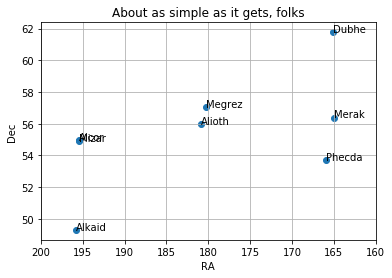

In [34]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(df['RA_Num'], df['Dec_Num'])

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

for i, txt in enumerate(df['Common Name']):
    ax.annotate(txt, df.iloc[i][['RA_Num','Dec_Num']].values.tolist())

#fig.savefig("test.png")
plt.xlim(200, 160)
#plt.ylim(63, 45)


plt.show()

In [36]:
12*360/24

180.0

In [101]:
def orthographic_Projection(point0, point):
    R = 1000
    lat = point[0] * math.pi / 180
    long = point[1] * math.pi / 180
    lat0 = point0[0] * math.pi / 180
    long0 = point0[1] * math.pi / 180
    
    x = R * math.cos(lat) * math.sin(long - long0)
    y = R * (math.cos(lat0)*math.sin(lat) - math.sin(lat0) * math.cos(lat) * math.cos(long - long0))
    c = math.sin(lat0) * math.sin(lat) + math.cos(lat0) * math.cos(lat) * math.cos(long - long0)
    
    print(f"x: {x}, y: {y}, c:{c}")
    #if c >= 0:
    return (x,y)
    #else:
    #    return None

In [102]:
orthographic_Projection((180,56), (195,49))

x: 117.71674622792335, y: 258.8190451025205, c:0.9587259616541789


(117.71674622792335, 258.8190451025205)

In [103]:
points = []
for i in df.iterrows():
    points.append(orthographic_Projection((180,56), (i[1]['RA_Num'], i[1]['Dec_Num'])))

x: 112.0449720265572, y: 272.15219135499115, c:0.9557086946262675
x: 17.02646738280658, y: 265.8998314458659, c:0.9638502887095705
x: 18.081608257853198, y: 265.53527108850375, c:0.9639315718715538
x: 0.7009539527928798, y: 15.715218799424997, c:0.9998762626253522
x: -18.02130676279939, y: 4.48669315852567, c:0.9998275361716451
x: -96.82096215489177, y: -257.7706634921564, c:0.9613428037543187
x: -6.446474930506321, y: -258.30205825333263, c:0.9660426955694361
x: 39.011482259796644, y: -243.66325474559096, c:0.969074982928916


In [104]:
x = []
y = []
for p in points:
    x.append(p[0])
    y.append(p[1])

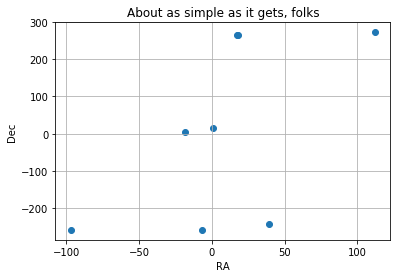

In [106]:
# Data for plotting
fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set(xlabel='RA', ylabel='Dec',
       title='About as simple as it gets, folks')
ax.grid()

#for i, txt in enumerate(df['Common Name']):
#    ax.annotate(txt, df.iloc[i][['RA_Num','Dec_Num']].values.tolist())

#fig.savefig("test.png")
#plt.xlim(0.11, -0.11)
#plt.ylim(63, 45)